In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import OrderedDict

In [75]:
df = pd.read_csv(
    "/Users/cameron/Dropbox/Weather/2320681.csv",
    parse_dates=['DATE'],
)

In [76]:
df[['DATE']]

,DATE
0,1945-07-01
1,1945-07-02
2,1945-07-03
3,1945-07-04
4,1945-07-05
...,...
27456,2020-10-10
27457,2020-10-11
27458,2020-10-12
27459,2020-10-13


In [77]:
df.columns

Index(['STATION', 'NAME', 'DATE', 'ACMH', 'ACSH', 'AWND', 'FMTM', 'FRGT',
       'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF1',
       'WDF2', 'WDF5', 'WDFG', 'WDFM', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG',
       'WSFM', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT07', 'WT08', 'WT09',
       'WT10', 'WT11', 'WT13', 'WT14', 'WT16', 'WT18', 'WT21', 'WV01', 'WV03',
       'WV20'],
      dtype='object')

In [183]:
groupers =[
    ('avg_high', np.mean),
    ('gt_70', lambda x: (x >= 70).sum()),
    ('gt_80', lambda x: (x >= 80).sum()),
    ('gt_90', lambda x: (x >= 90).sum()),
    ('gt_100', lambda x: (x >= 100).sum()),
]

In [184]:
group = df.groupby([df.DATE.dt.year])
high_temps = group['TMAX'].agg(groupers)

<AxesSubplot:xlabel='DATE'>

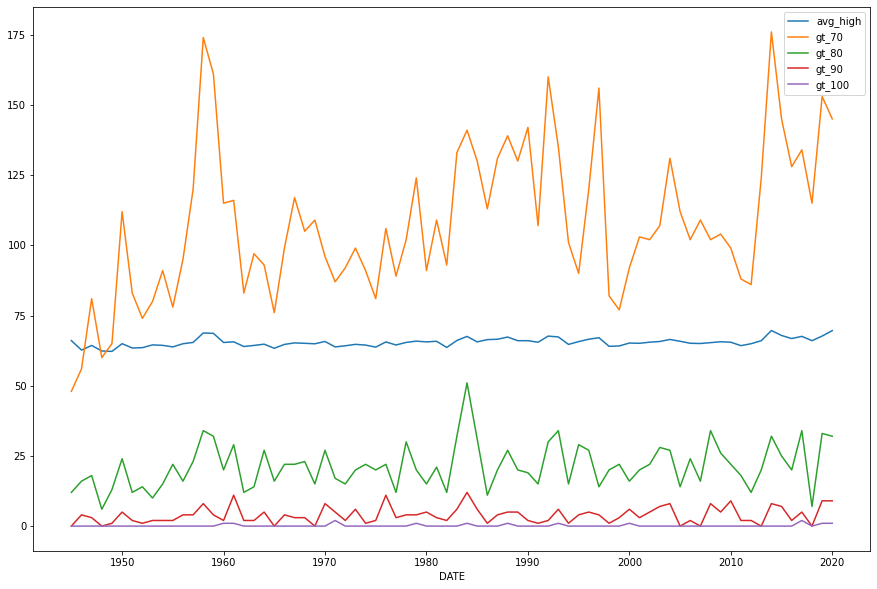

In [185]:
high_temps.plot(figsize=(15,10))

<AxesSubplot:xlabel='DATE', ylabel='gt_70'>

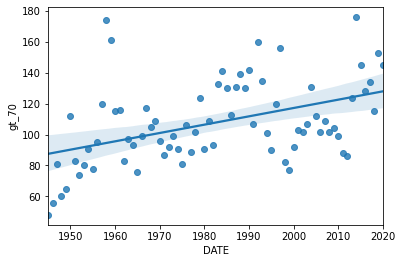

In [158]:
sns.regplot(x="DATE", y="gt_70", data=high_temps.reset_index())

<AxesSubplot:xlabel='DATE', ylabel='gt_80'>

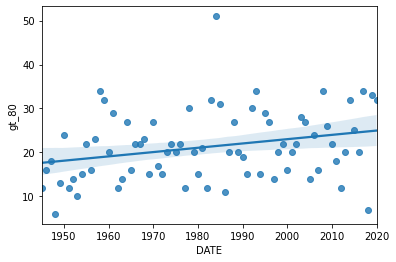

In [159]:
sns.regplot(x="DATE", y="gt_80", data=high_temps.reset_index())

<AxesSubplot:xlabel='DATE', ylabel='gt_90'>

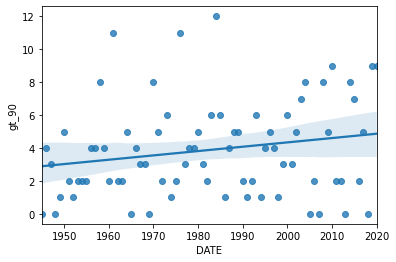

In [102]:
sns.regplot(x="DATE", y="gt_90", data=high_temps.reset_index())

<AxesSubplot:xlabel='DATE', ylabel='avg_high'>

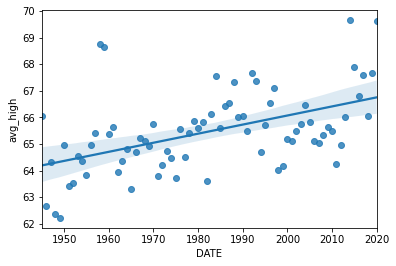

In [187]:
sns.regplot(x="DATE", y="avg_high", data=high_temps.reset_index())

In [176]:
high_temps['gt_70_rolling'] = high_temps['gt_70'].rolling(window=4).mean()
high_temps['gt_80_rolling'] = high_temps['gt_80'].rolling(window=4).mean()
high_temps['gt_90_rolling'] = high_temps['gt_90'].rolling(window=4).mean()

<AxesSubplot:xlabel='DATE', ylabel='gt_80_rolling'>

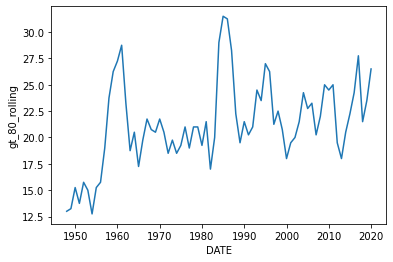

In [177]:
sns.lineplot(x="DATE", y="gt_80_rolling", data=high_temps)